# Sommaire :


### <a href="#C1"><font color='green'> **Partie 1 : Definition**</font></a>

 - Contexte

<b><hr></b>

### <a href="#C2"><font color='blue'> **Partie 2 : Mise en place de l'espace de travail**</font></a>
 - <a href="#C21"> 2.1 Import des packages</a>
 - <a href="#C22"> 2.2 Repertoire de travail</a>
 - <a href="#C23"> 2.3 Import des datas frames</a>

<b><hr></b>

### <a href="#C3"><font color='teal'> **Partie 3 : Clustering**</font></a>
 - <a href="#C31"> 3.1 RFM</a>
 - <a href="#C32"> 3.2 CAH</a>
 - <a href="#C33"> 3.3 KMeans</a>
 - <a href="#C34"> 3.4 DBSCAN</a>
    
<b><hr></b>
 
### <a href="#C4"><font color='red'> **Partie 4 : Fréquence de mise à jour de la segmentation**</font></a>

<b><hr></b>

...

# <a name="C1"><font color='green'>**Partie 1 : Contexte**</font></a> 

Olist est une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

Elle souhaite comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles.

Otis souhaite fournir à ses équipes d'e-commerce cette segmentation de clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

Mon rôle est de leur fournir une description actionnable de segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps. 

...

...

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os, warnings 

# Calcul
from math import pi

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,StandardScaler,MinMaxScaler,RobustScaler

#metrics
from sklearn.metrics import (mean_squared_error, silhouette_samples,silhouette_score,davies_bouldin_score,
                             adjusted_rand_score,adjusted_mutual_info_score,pair_confusion_matrix)

#cluster
from sklearn.cluster import AgglomerativeClustering, KMeans,MiniBatchKMeans, DBSCAN,MeanShift,SpectralClustering,Birch
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

# feature selection
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import entropy

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [2]:
os.listdir('data/cleaned/')

['base_client.csv', 'clients.csv', 'rfm_df.csv']

In [3]:
path = 'data/cleaned/'
# A completer
filename = 'base_client.csv'

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [4]:
df = pd.read_csv(path+filename,sep=';',index_col=0).dropna()#.sample(10000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90314 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   NbreCommande                                            90314 non-null  int64  
 1   NbreDarticleTotal_Sum                                   90314 non-null  float64
 2   delai_livraison_Mean                                    90314 non-null  float64
 3   NbreDarticleTotal_Mean                                  90314 non-null  float64
 4   NbreArticleUnique_Mean                                  90314 non-null  float64
 5   pourc_freight_Mean                                      90314 non-null  float64
 6   dist_livraison_Mean                                     90314 non-null  float64
 7   NbredeFractionPayment_Mean                              90314 non-nu

### Selection colonnes du dataset et reduction du jeu de données

<AxesSubplot:xlabel='NbreDarticleTotal_Sum', ylabel='Count'>

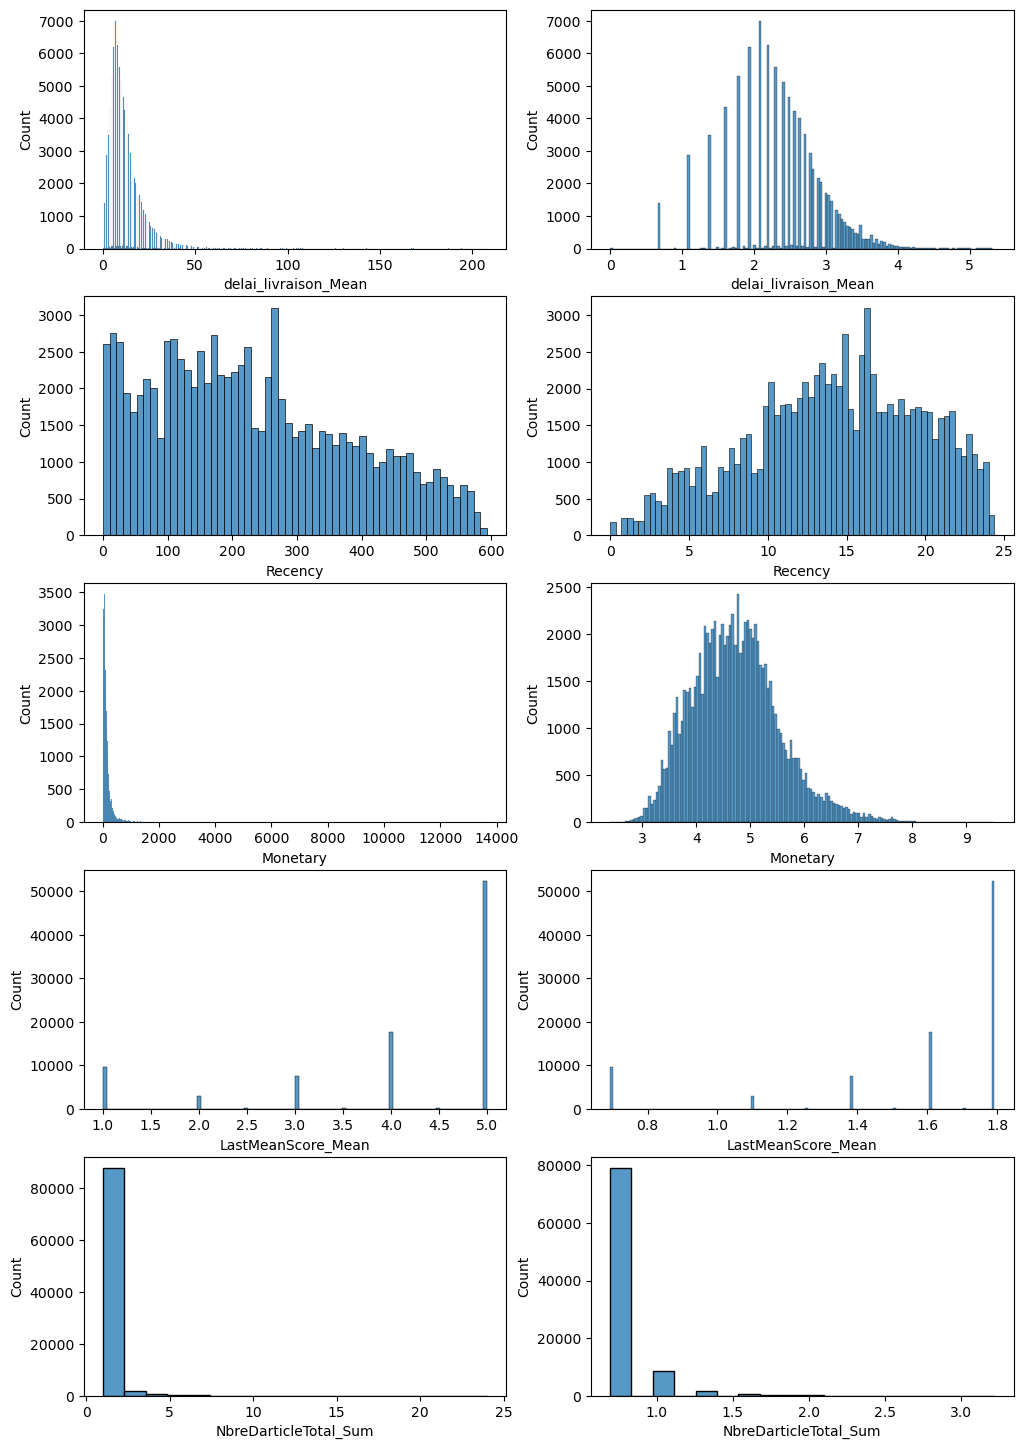

In [6]:
fig = plt.figure(figsize=(12,18))

ax = fig.add_subplot(521)
sns.histplot(x = df.delai_livraison_Mean,ax =ax )
#ax.set_title('histogramme delai de livraison')

ax = fig.add_subplot(522)
sns.histplot(x = np.log1p(df.delai_livraison_Mean ),ax =ax )
#ax.set_title('histogramme log delai de livraison')

ax = fig.add_subplot(523)
sns.histplot(x = df.Recency,ax =ax )
#ax.set_title('histogramme Recency')

ax = fig.add_subplot(524)
sns.histplot(x = np.sqrt(df.Recency ),ax =ax )
#ax.set_title('histogramme sqrt Recency')

ax = fig.add_subplot(525)
sns.histplot(x = df.Monetary,ax =ax )
#ax.set_title('histogramme Monetary')

ax = fig.add_subplot(526)
sns.histplot(x = np.log1p(df.Monetary ),ax =ax )
#ax.set_title('histogramme log Monetary')


ax = fig.add_subplot(527)
sns.histplot(x = df.LastMeanScore_Mean,ax =ax )
#ax.set_title('histogramme LastMeanScore_Mean')

ax = fig.add_subplot(528)
sns.histplot(x = np.log1p(df.LastMeanScore_Mean ),ax =ax )
#ax.set_title('histogramme log LastMeanScore_Mean')


ax = fig.add_subplot(529)
sns.histplot(x = df.NbreDarticleTotal_Sum,ax =ax )
#ax.set_title('histogramme NbreDarticleTotal_Sum')

ax = fig.add_subplot(5,2,10)
sns.histplot(x = np.log1p(df.NbreDarticleTotal_Sum ),ax =ax )
#ax.set_title('histogramme log NbreDarticleTotal_Sum')

<AxesSubplot:xlabel='NbreEchelonPayement_Mean', ylabel='Count'>

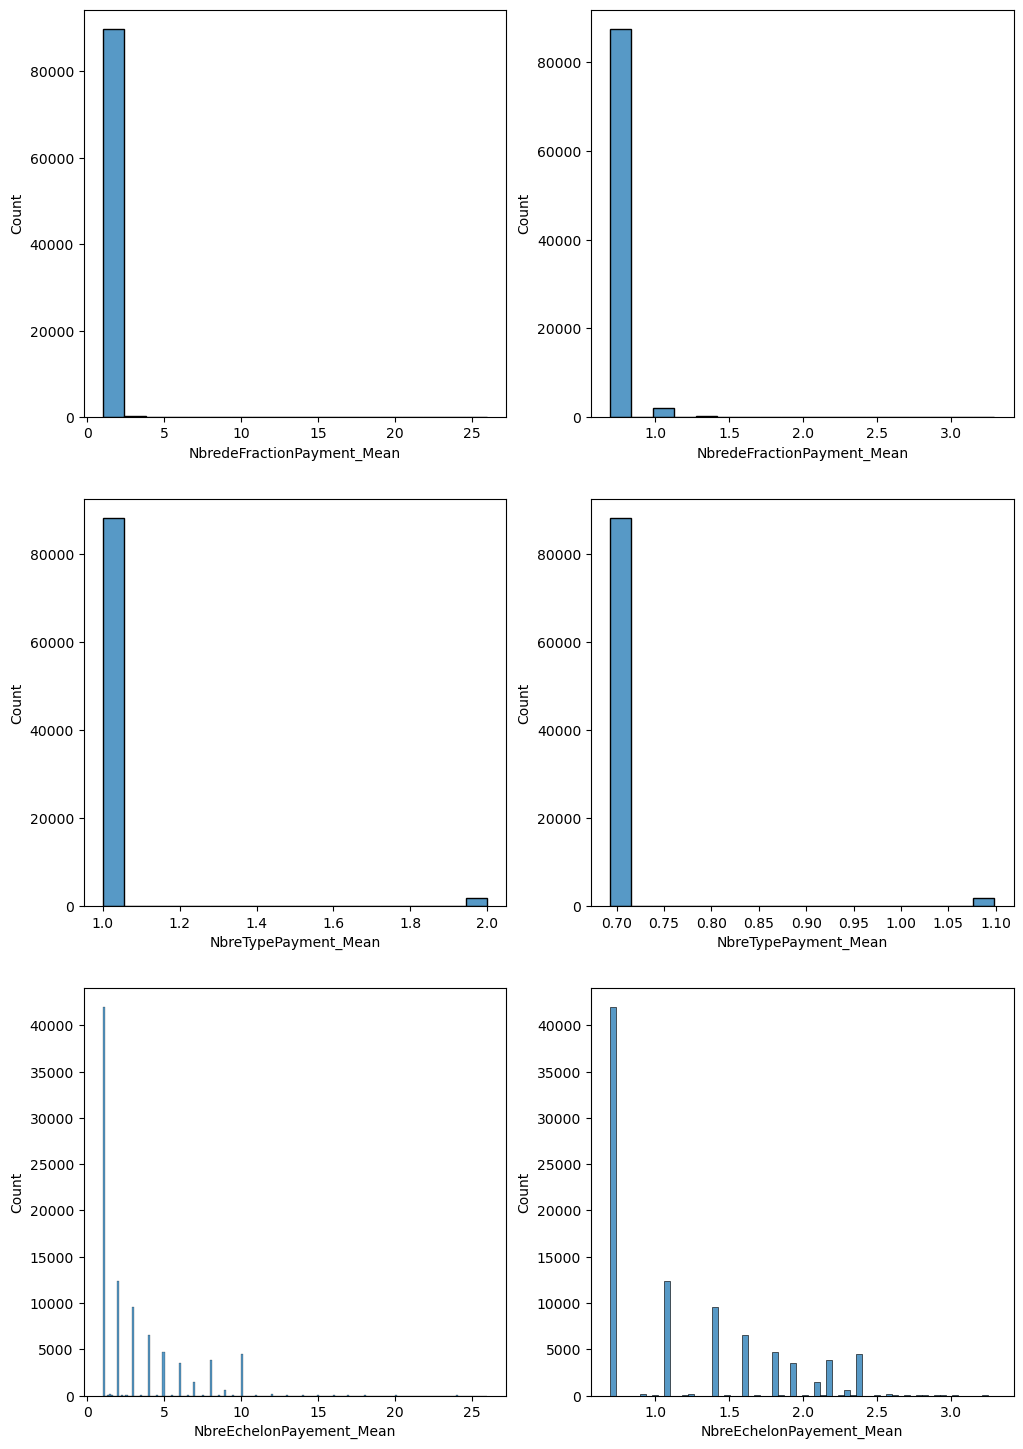

In [7]:
fig = plt.figure(figsize=(12,18))

ax = fig.add_subplot(321)
sns.histplot(x = df.NbredeFractionPayment_Mean,ax =ax )
#ax.set_title('histogramme NbredeFractionPayment_Mean')

ax = fig.add_subplot(322)
sns.histplot(x = np.log1p(df.NbredeFractionPayment_Mean ),ax =ax )
#ax.set_title('histogramme log NbredeFractionPayment_Mean')

ax = fig.add_subplot(323)
sns.histplot(x = df.NbreTypePayment_Mean,ax =ax )
#ax.set_title('histogramme NbreTypePayment_Mean')

ax = fig.add_subplot(324)
sns.histplot(x = np.log1p(df.NbreTypePayment_Mean ),ax =ax )
#ax.set_title('histogramme log NbreTypePayment_Mean')

ax = fig.add_subplot(325)
sns.histplot(x = df.NbreEchelonPayement_Mean,ax =ax )
#ax.set_title('histogramme NbreEchelonPayement_Mean')

ax = fig.add_subplot(326)
sns.histplot(x = np.log1p(df.NbreEchelonPayement_Mean ),ax =ax )
#ax.set_title('histogramme log NbreEchelonPayement_Mean')


In [8]:
df = df[['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum']]
df.shape

(90314, 5)

# <a name="C3"><font color='teal'>**Partie 3 : Clustering**</font></a> 

In [9]:
#Xgd_norm = RobustScaler().fit_transform(Xgd)
scaler = StandardScaler()
X_norm = scaler.fit_transform(df)

### <a name="C31"><font color='teal'>3.1 RFM</font></a>

In [10]:
df['r_quartile'] = pd.qcut(df['Recency'], 4, [4,3,2,1]).astype('int')
df['f_quartile'] = pd.cut(df['Frequency'],bins=[0,1,2,4,20],right=True,labels = [1,2,3,4] ).astype('int')
df['m_quartile'] = pd.qcut(df['Monetary'], 4, [1,2,3,4]).astype('int')

#### Combine RFM Quantile score
df['RFM_Score'] = df[['r_quartile','f_quartile','m_quartile']].sum(axis=1)

In [11]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return '0_Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return '1_Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return '2_Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return '3_Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return '4_Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return '5_Needs Attention'
    else:
        return '6_Require Activation'


# Create a new variable RFM_Level
df['RFM_Level'] = df.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
df.head()

,Recency,Frequency,Monetary,LastMeanScore_Mean,NbreDarticleTotal_Sum,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Level
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,104,1,141.90,5.0,1.0,4,1,3,8,1_Champions
0000b849f77a49e4a4ce2b2a4ca5be3f,107,1,27.19,4.0,1.0,4,1,1,6,3_Potential
0000f46a3911fa3c0805444483337064,530,1,86.22,3.0,1.0,1,1,2,4,5_Needs Attention
0000f6ccb0745a6a4b88665a16c9f078,314,1,43.62,4.0,1.0,2,1,1,4,5_Needs Attention
0004aac84e0df4da2b147fca70cf8255,281,1,196.89,5.0,1.0,2,1,4,7,2_Loyal


In [12]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = df.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg.sort_index() )

                     Recency Frequency Monetary       
                        mean      mean     mean  count
RFM_Level                                             
0_Can't Loose Them      61.8       1.2    396.3   6526
1_Champions            110.2       1.1    259.9  11514
2_Loyal                164.4       1.0    203.0  16630
3_Potential            228.7       1.0    163.5  21834
4_Promising            287.6       1.0     87.5  16645
5_Needs Attention      356.6       1.0     64.1  11340
6_Require Activation   446.7       1.0     43.5   5825


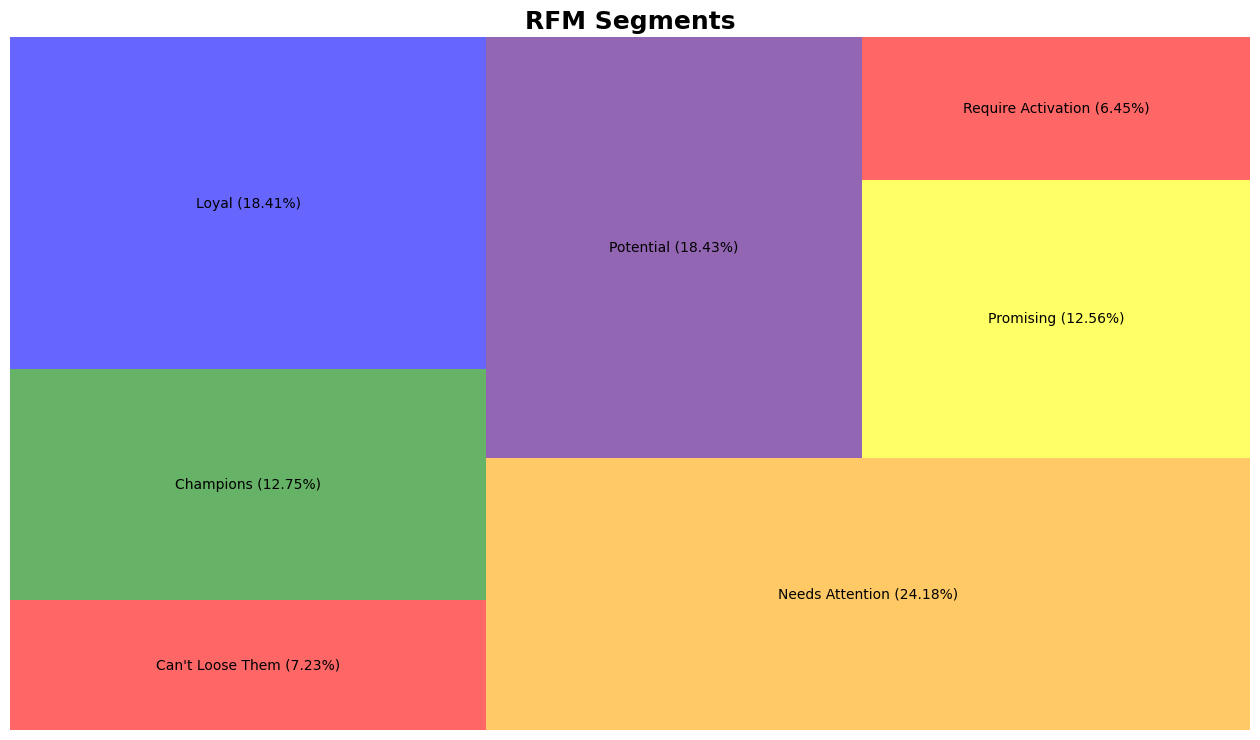

In [13]:
import squarify
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)

color = ['red', 'green', 'blue', 'orange','indigo','yellow']

squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them (7.23%)',
                     'Champions (12.75%)',
                     'Loyal (18.41%)',
                     'Needs Attention (24.18%)',
                     'Potential (18.43%)', 
                     'Promising (12.56%)', 
                     'Require Activation (6.45%)'], alpha=.6,color=color )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Connaissance metier insuffisance et qualité clustering dépendra du parametrage initié par le DS

### <a name="C32"><font color='teal'>3.2 CAH</font></a>

Lancer un CAH sur l'ensemble des dnnées demande une puissance machine importante, et un temps d'exécution élevé.</br>
Methode 1: Lancer CAH sur echantillons de données n = 10000</br>
Méthode 2: lancer kmeans avec k = 10000, récuperer les k=10000 centres de clusters, lancer CAH sur les 10000 centres

#### <font color='teal'>Méthode 1 : Echantillonnage</font>

CPU times: total: 48.4 s
Wall time: 1min 2s


Text(0.5, 1.0, 'average link')

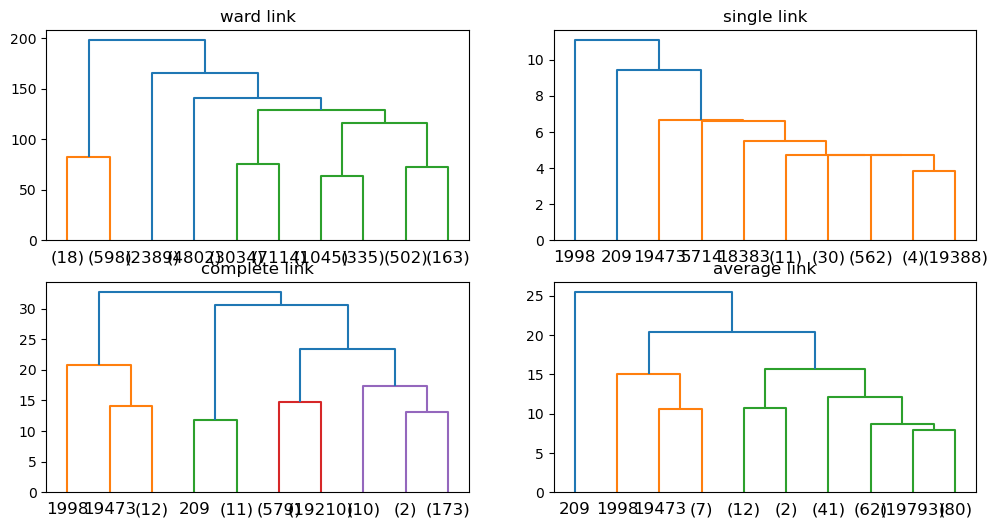

In [14]:
%%time

fig = plt.figure(figsize=(12,6))

Xtest = X_norm[np.random.randint(X_norm.shape[0],size=20000),:]

ax = fig.add_subplot(221)
Z = linkage(Xtest,method='ward')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('ward link')

ax = fig.add_subplot(222)
Z = linkage(Xtest,method='single')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('single link')

ax = fig.add_subplot(223)
Z = linkage(Xtest,method='complete')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('complete link')

ax = fig.add_subplot(224)
Z = linkage(Xtest,method='average')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('average link')


plusieurs choix seront testés.</br>
k = 2 ou k = 3 ou k= 6

CPU times: total: 53.2 s
Wall time: 40.4 s


Text(0.5, 1.0, 'Indice de Davies Bouldin \nMinimum atteint à k=2')

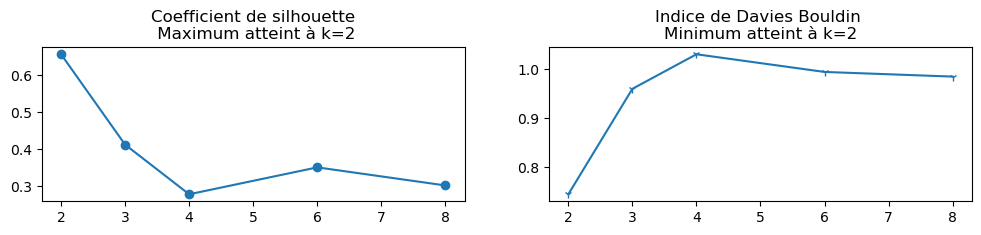

In [15]:
%%time
warnings.filterwarnings("ignore")

silhouette = []
DaviesBouldin = []
N_CLUSTER_TESTER = [2,3,4,6,8]

Z = linkage(Xtest,method='ward')

# Selection du nombre de cluster K optimal
# 1
for k in N_CLUSTER_TESTER:
    clustersCAH = fcluster(Z, k, criterion='maxclust')
    slh = silhouette_score(Xtest, clustersCAH, metric='euclidean')
    dbi = davies_bouldin_score(Xtest, clustersCAH)
    
    silhouette.append(slh)
    DaviesBouldin.append(dbi)

fig = plt.figure(figsize=(12,2))

ax = fig.add_subplot(121)
ax.plot(N_CLUSTER_TESTER, silhouette,marker='o')
ax.set_title('Coefficient de silhouette\n Maximum atteint à k='+str(N_CLUSTER_TESTER[np.argmax(silhouette)]))


ax = fig.add_subplot(122)
ax.plot(N_CLUSTER_TESTER, DaviesBouldin,marker='1')
ax.set_title('Indice de Davies Bouldin \nMinimum atteint à k='+str( N_CLUSTER_TESTER[np.argmin(DaviesBouldin)] ));

#Meilleur regroupement score silhouette max et Indice DB min
# Meilleur se situe au niveau du coude de l'ébolie d'inertie
# best k = 4

Je choisi la méthode de ward qui fourni plus de groupe

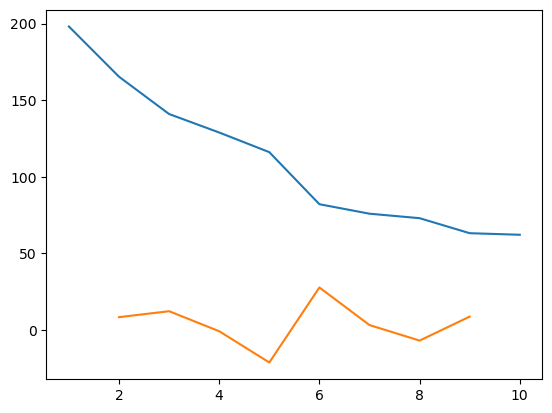

Best number of clusters: 6


In [16]:
Z = linkage(Xtest,method='ward')

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("Best number of clusters:", k)

#### <font color='teal'> Visualisation grace a l'ACP et T-SNE</font>

In [17]:
from sklearn.decomposition import PCA
pcav = PCA()
pcav.fit(Xtest)
print("Le pourcentage d'inertie expliqué par les 2 premiers axes est ", pcav.explained_variance_ratio_.cumsum()[1])
print('\n',pcav.explained_variance_)
X_projtest=pcav.transform(Xtest)

Le pourcentage d'inertie expliqué par les 2 premiers axes est  0.5192014777144593

 [1.49275749 1.024751   0.97615742 0.82791193 0.52723057]


''

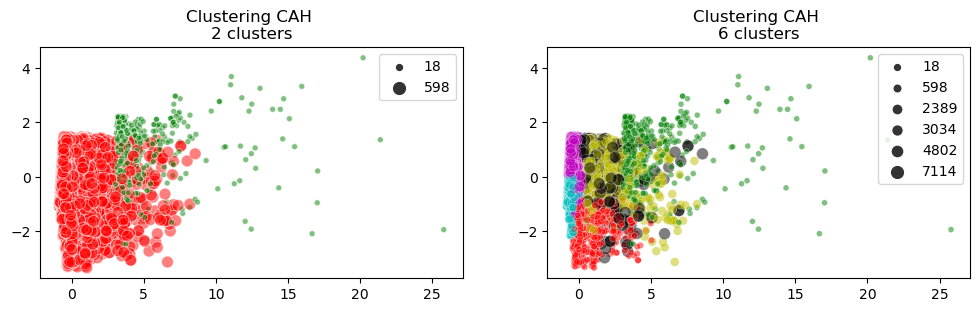

In [18]:
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure(figsize=(12,3))

couleurs = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
_, counts = np.unique(clustersCAH, return_counts=True)

# k=2 
#ACP
clustersCAH = fcluster(Z, 2, criterion='maxclust')
ax = fig.add_subplot(121)
sns.scatterplot(X_projtest[:,0],X_projtest[:,1],
                c=[couleurs[i] for i in clustersCAH],
               size=[counts[i-1] for i in clustersCAH],
               alpha=0.5)
ax.set_title('Clustering CAH \n2 clusters')


# k=6 
#ACP
clustersCAH = fcluster(Z, 6, criterion='maxclust')
ax = fig.add_subplot(122)
sns.scatterplot(X_projtest[:,0],X_projtest[:,1],
                c=[couleurs[i] for i in clustersCAH],
                size=[counts[i-1] for i in clustersCAH],
               alpha=0.5)
ax.set_title('Clustering CAH \n6 clusters')
;

### <font color='teal'>Description Clustering</font>

In [80]:
DF_result_CAH = scaler.inverse_transform(Xtest)

colonnes = ['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum']
DF_result_CAH = pd.DataFrame(DF_result_CAH,columns = colonnes)

DF_result_CAH['ResultCAHward2'] = clustersCAH = fcluster(Z, 2, criterion='maxclust')
DF_result_CAH['ResultCAHward3'] = fcluster(Z, 3, criterion='maxclust')
DF_result_CAH['ResultCAHward6'] = fcluster(Z, 6, criterion='maxclust')

In [20]:
pd.set_option('display.max_rows', None)
DF_result_CAH.groupby(['ResultCAHward2']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

ResultCAHward2,1,2
Recency,205.558442,231.738083
Frequency,2.076299,1.000000
Monetary,321.982808,160.897605
LastMeanScore_Mean,4.178301,4.106892
NbreDarticleTotal_Sum,2.722403,1.136092
ResultCAHward3,1.000000,2.876754
ResultCAHward6,1.000000,3.645584


In [21]:
pd.set_option('display.max_rows', None)
DF_result_CAH.groupby(['ResultCAHward3']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

ResultCAHward3,1,2,3
Recency,205.558442,252.232315,228.857193
Frequency,2.076299,1.000000,1.000000
Monetary,321.982808,176.997195,158.634473
LastMeanScore_Mean,4.178301,1.186689,4.517387
NbreDarticleTotal_Sum,2.722403,1.281708,1.115622
ResultCAHward2,1.000000,2.000000,2.000000
ResultCAHward6,1.000000,2.000000,3.876905


In [22]:
pd.set_option('display.max_rows', None)
DF_result_CAH.groupby(['ResultCAHward6']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

ResultCAHward6,1,2,3,4,5,6
Recency,205.558442,252.232315,409.007497,145.307351,229.365217,201.911278
Frequency,2.076299,1.000000,1.000000,1.000000,1.000000,1.000000
Monetary,321.982808,176.997195,116.035444,119.201624,220.498239,939.616571
LastMeanScore_Mean,4.178301,1.186689,4.482716,4.545231,4.450000,4.482707
NbreDarticleTotal_Sum,2.722403,1.281708,1.000000,1.000000,2.402174,1.045113
ResultCAHward2,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
ResultCAHward3,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000


In [23]:
#DF_result_CAH = scaler.inverse_transform(Xtest)

colonnes = ['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum']
DF_result_CAH = pd.DataFrame(Xtest,columns = colonnes)

DF_result_CAH['ResultCAHward2'] = fcluster(Z, 2, criterion='maxclust')

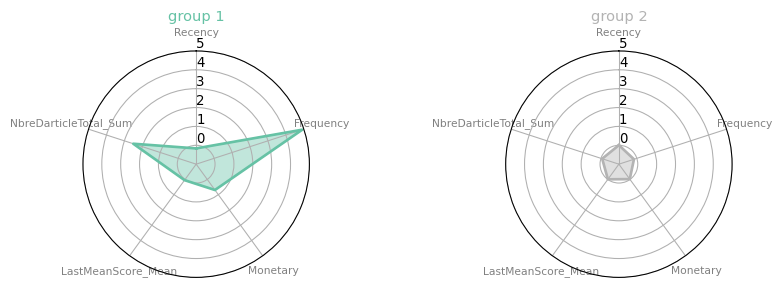

In [24]:
# Cluster
nom_cluster = 'ResultCAHward2'
 
# Set data
dff = DF_result_CAH.groupby([nom_cluster]).mean().reset_index()#.drop(columns=['ResultCAHward3','ResultCAHward6'])
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(dff)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([-2,-1,0,1,2,3,4,5], ["-2","-1","0","1","2","3","4","5"], color="grey", size=7)
    plt.ylim(-1,5)

    # Ind1
    values=dff.loc[row].drop(nom_cluster).values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(dff.index))
 
# Loop to plot
for row in range(0, len(dff.index)):
    make_spider( row=row, title='group '+ str(dff[nom_cluster][row]), color=my_palette(row))

Idem

<AxesSubplot:>

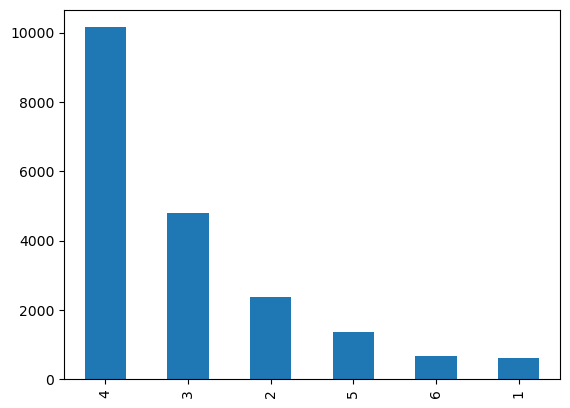

In [25]:
pd.Series(clustersCAH).value_counts().plot(kind='bar')

In [82]:
print('silhouette score:',silhouette_score(Xtest, clustersCAH, metric='euclidean'), ' davies_bouldin_score:',
davies_bouldin_score(Xtest, clustersCAH))

silhouette score: 0.6556329296512707  davies_bouldin_score: 0.7455266296493019


#### <font color='teal'> Methode 2 CAH sur centre kmeans </font>

CPU times: total: 2min 46s
Wall time: 32.6 s


Text(0.5, 1.0, 'ward link')

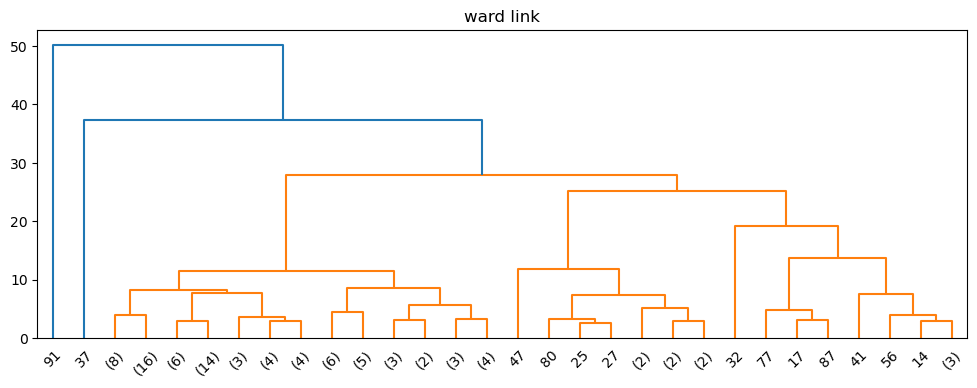

In [26]:
%%time

fig = plt.figure(figsize=(12,4))

cls = KMeans(n_clusters=100,init = 'random',n_init=20)
cls.fit(X_norm)
centres = cls.cluster_centers_

ax = fig.add_subplot(111)
ZZ = linkage(centres,method='ward')
_ = dendrogram(ZZ,p=30,truncate_mode='lastp',ax=ax)
ax.set_title('ward link')

### <a name="C33"><font color='teal'>3.3 KMeans</font></a>

#### <a name="C331"><font color='teal'>3.3.1 Selection du nombre de cluster K optimal</font></a>

##### <a name="C311"><font color='teal'>Coefficient de silhouette et DB Index</font></a>

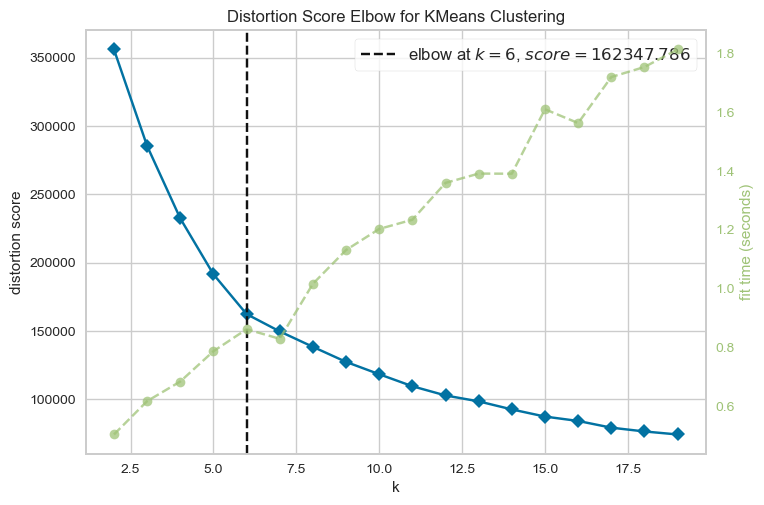

In [27]:
import matplotlib as mpl 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#mpl.rcParams["figure.figsize"] = (9,6)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_norm)    # Fit the data to the visualizer
visualizer.poof() ;   # Draw/show/poof the data

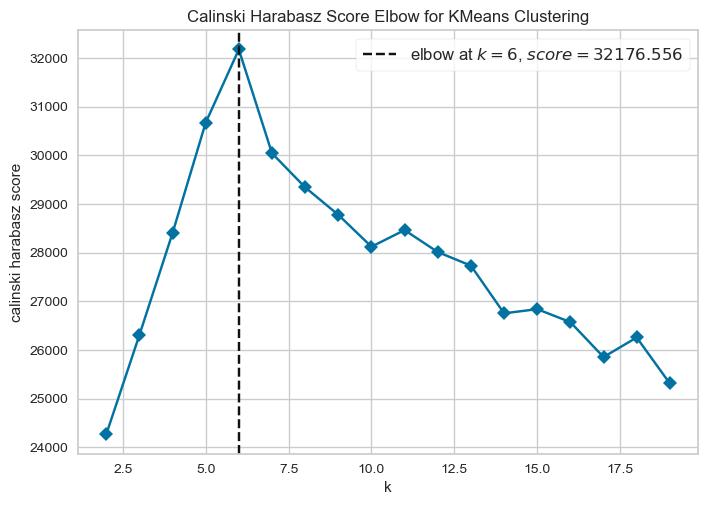

In [28]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz', timings=False)

visualizer.fit(X_norm)    # Fit the data to the visualizer
visualizer.poof();    # Draw/show/poof the data

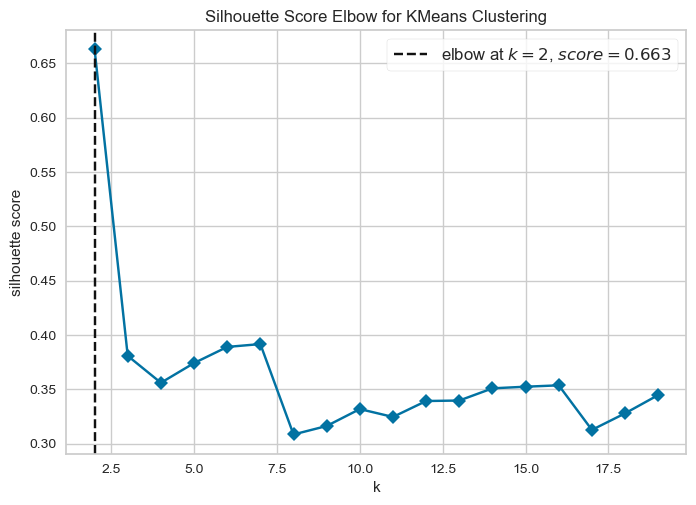

In [87]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

visualizer.fit(X_norm)    # Fit the data to the visualizer
visualizer.poof();    # Draw/show/poof the data

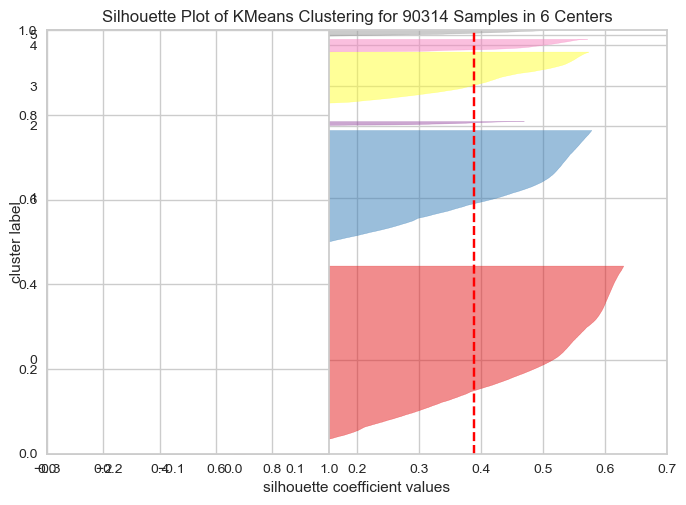

In [31]:
# Instantiate the clustering model and visualizer 

fig = plt.figure()

## 6 groupes
model = KMeans(n_clusters=6)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(X_norm)    # Fit the data to the visualizer

ax2 = fig.add_subplot(121)
ax2 = visualizer.poof()    # Draw/show/poof the data


<div class="alert alert-warning">Le meilleur nombre de cluster est selon:</br>
    - Le coefficient de silhouette 2 </br>
    - La courbe de l'inertie intraclasse 6</br>
    - l'indice de Davies Bouldin 2</br>
   Conserver 2groupes
    </div>

In [90]:
%%time
warnings.filterwarnings("ignore")

silhouette = []
DaviesBouldin = []
inertie = []
N_CLUSTER_TESTER = [2,3,4,6,8]


# Selection du nombre de cluster K optimal
# 1
for k in N_CLUSTER_TESTER:
    tkmeans = KMeans(n_clusters=6,init='k-means++')
    tkmeans.fit(X=X_norm)
    labelkmeans = tkmeans.labels_
    slh = silhouette_score(X_norm, labelkmeans, metric='euclidean')
    dbi = davies_bouldin_score(X_norm, labelkmeans)
    
    inertie.append(labelkmeans.inertia_)
    silhouette.append(slh)
    DaviesBouldin.append(dbi)

fig = plt.figure(figsize=(12,2))

ax = fig.add_subplot(131)
ax.plot(N_CLUSTER_TESTER, silhouette,marker='o')
ax.set_title('Coefficient de silhouette\n Maximum atteint à k='+str(N_CLUSTER_TESTER[np.argmax(silhouette)]))


ax = fig.add_subplot(132)
ax.plot(N_CLUSTER_TESTER, DaviesBouldin,marker='1')
ax.set_title('Indice de Davies Bouldin \nMinimum atteint à k='+str( N_CLUSTER_TESTER[np.argmin(DaviesBouldin)] ))


ax = fig.add_subplot(133)
ax.plot(N_CLUSTER_TESTER, inertie,marker='1')
ax.set_title('Inertie' );

#Meilleur regroupement score silhouette max et Indice DB min
# Meilleur se situe au niveau du coude de l'ébolie d'inertie
# best k = 4

AttributeError: 'numpy.ndarray' object has no attribute 'inertia_'

In [89]:
tkmeans.inertia_

KMeans(n_clusters=6)

##### <a name="C311"><font color='teal'>Visualisation </font></a>

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_norm)
print("Le pourcentage d'inertie expliqué par les 2 premiers axes est ", pca.explained_variance_ratio_.cumsum()[1])
X_proj=pca.transform(X_norm)

Le pourcentage d'inertie expliqué par les 2 premiers axes est  0.5172583092718841


CPU times: total: 2min 32s
Wall time: 1min 37s


''

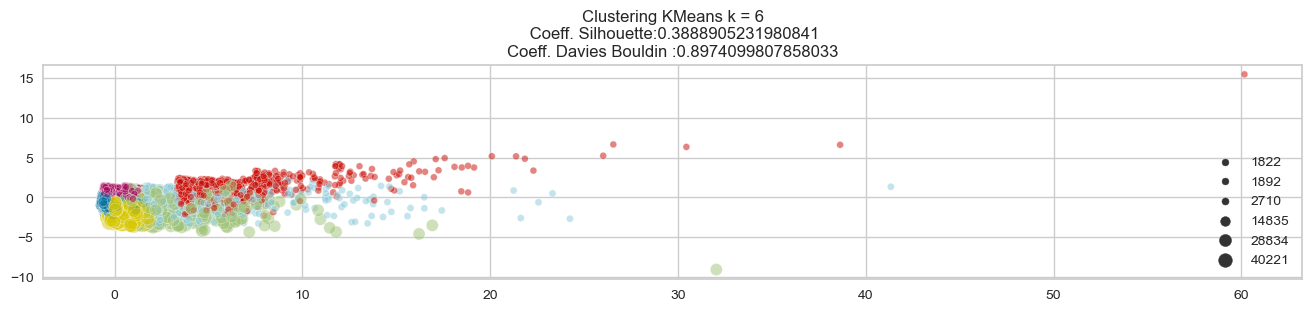

In [33]:
%%time
fig, axs = plt.subplots(1, 1, figsize=(13, 3), constrained_layout=True)

km = KMeans(n_clusters=6,init='k-means++')
km.fit(X=X_norm)
labels = km.labels_

couleurs = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
_, counts = np.unique(labels, return_counts=True)

sns.scatterplot(X_proj[:,0],X_proj[:,1],c=[couleurs[i] for i in labels],
                ax=axs,
                size=[counts[i-1] for i in labels],
                alpha=0.5 )

title_text = 'Clustering KMeans k = 6\n Coeff. Silhouette:'\
+ str(silhouette_score(X_norm, labels, metric='euclidean'))\
              + '\nCoeff. Davies Bouldin :'\
              +str(davies_bouldin_score(X_norm, labels))

axs.set_title( title_text )
;

#### Intercluster Distance

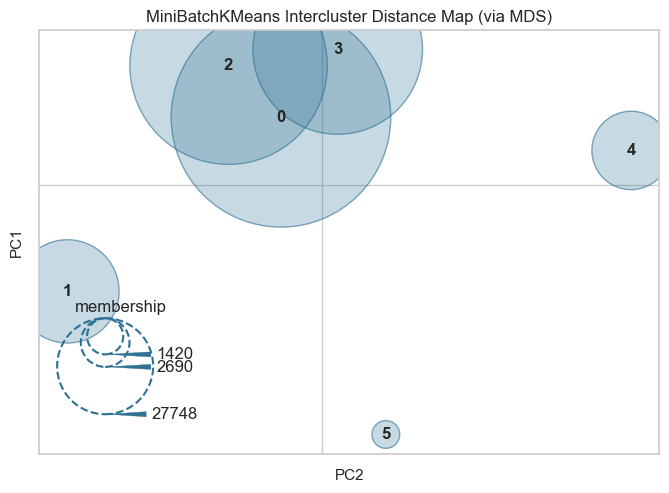

CPU times: total: 2.06 s
Wall time: 748 ms


In [34]:
%%time
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans

couleurs = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
_, counts = np.unique(clustersCAH, return_counts=True)


visualizer = intercluster_distance(estimator=MiniBatchKMeans(6, random_state=777,batch_size=2048),
                                   embedding='mds', X=X_norm)


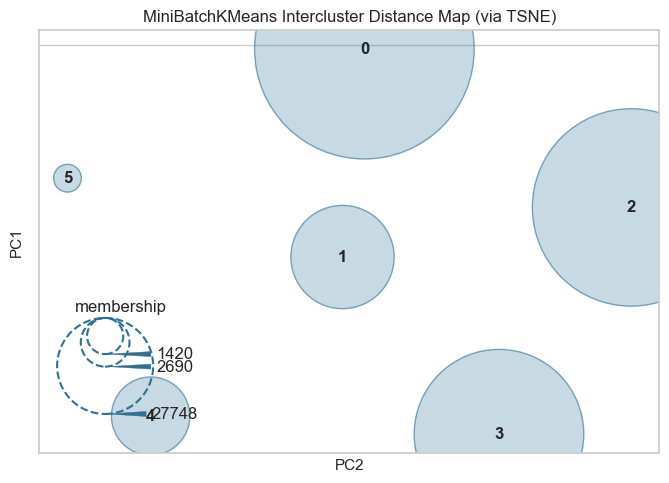

In [35]:
visualizer = intercluster_distance(estimator=MiniBatchKMeans(6, random_state=777,batch_size=2048),
                                   embedding='tsne', X=X_norm)

##### RadViz

In [ ]:
from yellowbrick.features.rankd import Rank2D
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates

In [ ]:
%%time
classe = ["mauvais" ,'mediocre','moyen','bon','tres bon','excellent'] 
X = df.drop(columns=['Customer_segment','R_rank_norm','F_rank_norm','M_rank_norm','RFM_Score']).copy()
y =  labels

visualizer = RadViz(classes=classe, features=X.columns )


visualizer.fit(X.values,y)      # Fit the data to the visualizer
visualizer.transform(X.values)   # Transform the data
visualizer.poof();

In [ ]:
%%time
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classe, features=X.columns)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof();         # Draw/show/poof the data

In [43]:
DF_resultFinal_kmeans = pd.DataFrame(X_norm,
                             columns=['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum'])

DF_resultFinal_kmeans['Resultkmeans6'] = labels

In [54]:
pd.set_option('display.max_rows', None)
segments = DF_resultFinal_kmeans.groupby(['Resultkmeans6']).mean().T
segments.columns = ['Group_'+ str(x+1) for x in segments.columns]
segments\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

,Group_1,Group_2,Group_3,Group_4,Group_5,Group_6
Recency,1.049554,-0.015478,-0.102088,-0.027366,-0.739069,-0.012141
Frequency,-0.161452,-0.112322,5.099166,-0.036947,-0.161452,-0.161452
Monetary,-0.149638,4.836867,0.523599,0.789629,-0.152818,-0.085241
LastMeanScore_Mean,0.391830,-0.004479,0.036796,-0.535300,0.432481,-1.872033
NbreDarticleTotal_Sum,-0.182487,-0.027236,2.073988,4.473154,-0.194213,-0.064768


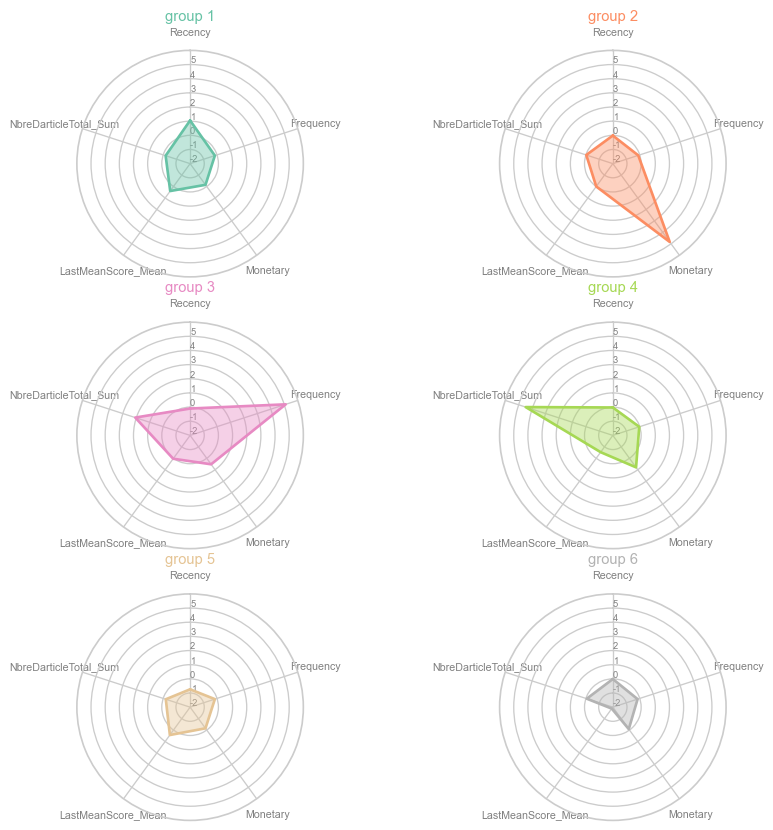

In [53]:
from math import pi
 
# Set data
dff = DF_resultFinal_kmeans.groupby(['Resultkmeans6']).mean().reset_index()
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(dff)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-2,-1,0,1,2,3,4,5], ["-2","-1","0","1","2","3","4","5"], color="grey", size=7)
    plt.ylim(-2,6)

    # Ind1
    values=dff.loc[row].drop('Resultkmeans6').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(dff.index))
 
# Loop to plot
for row in range(0, len(dff.index)):
    make_spider( row=row, title='group '+ str(dff['Resultkmeans6'][row]+1), color=my_palette(row))

In [84]:
DF_resultFinal_kmeans = scaler.inverse_transform(X_norm)

colonnes = ['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum']
DF_resultFinal_kmeans = pd.DataFrame(DF_resultFinal_kmeans,columns = colonnes)

DF_resultFinal_kmeans['Resultkmeans6'] = labels

In [85]:
segments = DF_resultFinal_kmeans.groupby(['Resultkmeans6']).mean().T
segments.columns = ['Group_'+ str(x+1) for x in segments.columns]
segments\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

,Group_1,Group_2,Group_3,Group_4,Group_5,Group_6
Recency,389.670146,228.298573,215.175646,226.497357,118.661495,228.804112
Frequency,1.000000,1.010428,2.116605,1.026427,1.000000,1.000000
Monetary,131.850038,1257.999018,283.893502,343.973478,131.132032,146.393622
LastMeanScore_Mean,4.631373,4.110593,4.164832,3.413055,4.684792,1.656488
NbreDarticleTotal_Sum,1.066796,1.162459,2.457196,3.935518,1.059571,1.139333


##### <a name="C311"><font color='teal'>Stabilité du clustering</font></a>

In [ ]:
%%time

import warnings
warnings.filterwarnings("ignore")


# Selection du nombre de cluster K optimal en fonction de la stabilité
fig, ax = plt.subplots(4,2, figsize=(20, 10) )

for lll in range(4):
    ARI = []
    AMI = []
    cc = []
    for k in N_CLUSTER_TESTER:
        cc = []
        for l in range(2):
            cls = KMeans(n_clusters=k, init = 'k-means++')
            cls.fit(X_norm)
            cc.append(cls.labels_)
        ari = adjusted_rand_score(cc[0], cc[1])
        ami = adjusted_mutual_info_score(cc[0], cc[1])

        ARI.append(ari)
        AMI.append(ami)

    #fig = plt.figure(figsize=(12,3))

    #ax = fig.add_subplot(121)
    ax[lll][0].plot(N_CLUSTER_TESTER, ARI,marker='o')
    ax[lll][0].set_title('Adjusted Rand Score\n Stabilité atteinte à k='+str( N_CLUSTER_TESTER[np.argmax(ARI)] ) )

    #ax = fig.add_subplot(122)
    ax[lll][1].plot(N_CLUSTER_TESTER, AMI,marker='1')
    ax[lll][1].set_title('Adjusted Mutual Info Score\n Stabilité atteinte à k='+str( N_CLUSTER_TESTER[np.argmax(AMI)] ) );

### Stable si Indice égale 1 dc k=2 ou k=4 sont conservés

In [83]:
print('silhouette score:',silhouette_score(X_norm, labels, metric='euclidean'), ' davies_bouldin_score:',
davies_bouldin_score(X_norm, labels))

silhouette score: 0.3888905231980841  davies_bouldin_score: 0.8974099807858033


### <a name="C34"><font color='teal'>3.4 DBSCAN</font></a>

### Find MinPts et ε

How to determine MinPts</br>
set D = X_norm.shape[1] </br>
- MinPts ⩾ D + 1</br>
- MinPts = 2 * D </br>


How to determine ε (Epsilon)

CPU times: total: 6.83 s
Wall time: 7.26 s


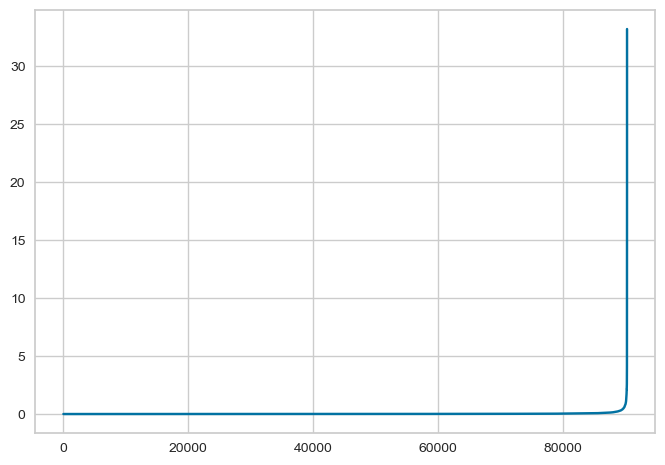

In [57]:
%%time
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=X_norm.shape[1] * 2)
neighbors_fit = neighbors.fit(X_norm)
distances, indices = neighbors_fit.kneighbors(X_norm)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

Zoom sur le coude

best epsilon 1: 7.13 et best epsilon 2: 10.13
CPU times: total: 0 ns
Wall time: 30.4 ms


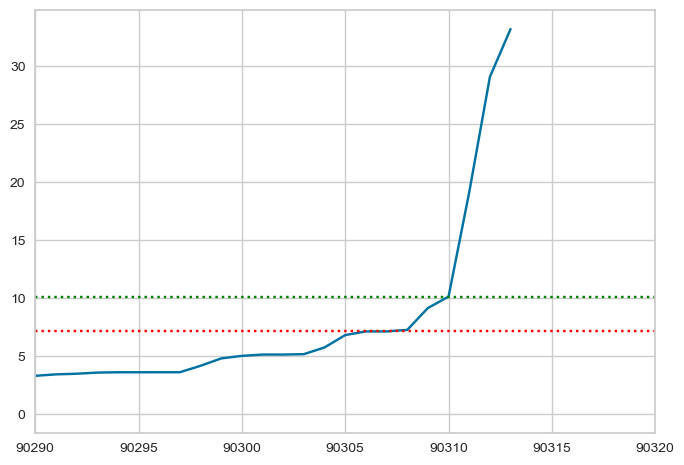

In [60]:
%%time
ax = plt.subplot(111)
ax.set_xlim(90290,90320)

best_k = 90307
best_k2 = 90310

ax.plot(distances)
# only one line may be specified; full height
plt.axhline(y = distances[best_k], color = 'red', ls=':',label = 'axvline - full height')
plt.axhline(y = distances[best_k2], color = 'green', ls=':',label = 'axvline - full height');
print('best epsilon 1:',round(distances[best_k],2),'et best epsilon 2:',round(distances[best_k2],2))
best_epsilon = round(distances[best_k],2)

In [62]:
X_red = X_norm[np.random.choice(range(X_norm.shape[0]),replace=False, size=20000),:]

CPU times: total: 31.9 s
Wall time: 27.3 s


Text(0.5, 1.0, 'Indice de Davies Bouldin \nMinimum atteint à eps=10')

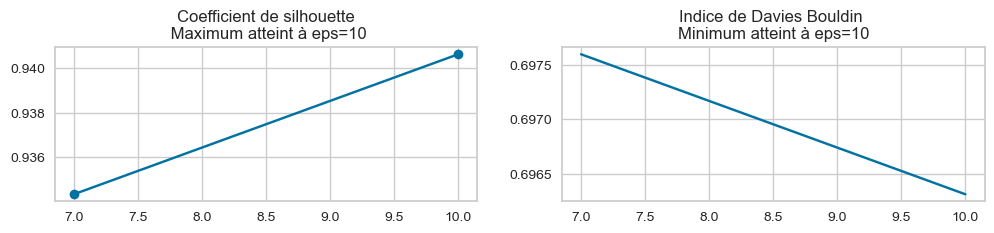

In [63]:
%%time
import warnings
warnings.filterwarnings("ignore")

silhouette = []
inertie = []
DaviesBouldin = []
EPS_TESTER = [7,10]

# Selection du nombre de cluster K optimal
# 1
for k in EPS_TESTER:
    dbscan = DBSCAN(eps=k, metric='euclidean',min_samples=X_red.shape[1]*2,algorithm='kd_tree')
    dbscan.fit(X_red)
    slh = silhouette_score(X_red, dbscan.labels_, metric='euclidean')
    dbi = davies_bouldin_score(X_red, dbscan.labels_)
    
    silhouette.append(slh)
    DaviesBouldin.append(dbi)
    

fig = plt.figure(figsize=(12,2))

ax = fig.add_subplot(121)
ax.plot(EPS_TESTER, silhouette,marker='o')
ax.set_title('Coefficient de silhouette\n Maximum atteint à eps='+str(EPS_TESTER[np.argmax(silhouette)]))

ax = fig.add_subplot(122)
ax.plot(EPS_TESTER, DaviesBouldin,marker='1')
ax.set_title('Indice de Davies Bouldin \nMinimum atteint à eps='+str( EPS_TESTER[np.argmin(DaviesBouldin)] ));


#Meilleur regroupement score silhouette max et Indice DB min
# Meilleur se situe au niveau du coude de l'ébolie d'inertie
# best k = 4

In [64]:
pcaRed = PCA()
pcaRed.fit(X_red)
print("Le pourcentage d'inertie expliqué par les 2 premiers axes est ", pcaRed.explained_variance_ratio_.cumsum()[1])
X_projRed=pcaRed.transform(X_red)

dbscan = DBSCAN(eps=10, metric='euclidean',min_samples=2 * X_norm.shape[1])
dbscan.fit(X_red)
dbscan_labels = dbscan.labels_

Le pourcentage d'inertie expliqué par les 2 premiers axes est  0.5156153104646575


In [65]:
pd.Series(dbscan_labels).value_counts()

 0    19996
-1        4
dtype: int64

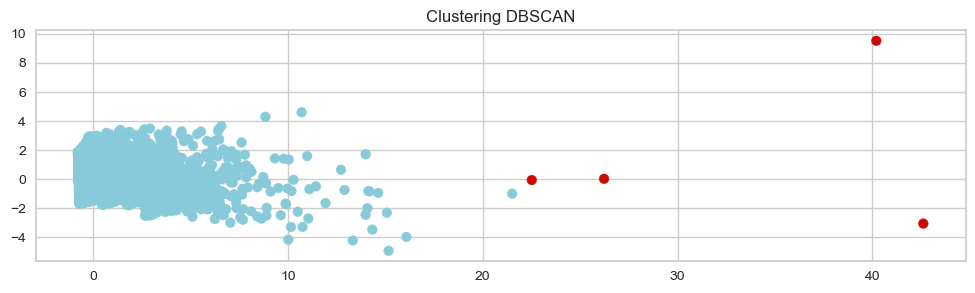

In [66]:
fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(111)
plt.scatter(X_projRed[:,0],X_projRed[:,1],c=[couleurs[i+3] for i in dbscan_labels])
ax.set_title('Clustering DBSCAN');

DBSCAN a créé un groupe unique et à detrecter un ensemble d'outliers

### <font color='teal'>Description Clustering</font>

In [47]:
pd.set_option('display.max_rows', None)

DF_result_DB = pd.DataFrame(X_red,
                             columns=['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum'])

DF_result_DB['ResDBscan'] = dbscan.labels_
DF_result_DB.groupby(['ResDBscan']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

ResDBscan,-1,0
Recency,0.338945,-0.004270
Frequency,13.972329,-0.007135
Monetary,3.566927,-0.006280
LastMeanScore_Mean,-0.906001,-0.000240
NbreDarticleTotal_Sum,26.757396,-0.003351
